# Thermonuclear Fusion


همجوشی گرما هسته‌ای فرآیندی‌ است که در آن دو هستهٔ سبک (مانند دوتریوم و تریتیوم) در دمای بسیار بالا (میلیون‌ها درجه) با غلبه بر نیروی دافعهٔ کولنی به یکدیگر برخورد کرده و هستهٔ سنگین‌تری تولید می‌کنند. این واکنش انرژی زیادی آزاد می‌کند و اساس راکتورهای همجوشی مغناطیسی و لیزری را تشکیل می‌دهد

---
## Main Reactions
**1.D_T Fusion:**
$$
 \mathrm{D} + \mathrm{T} \longrightarrow\ \mathrm{n}\ + ^4\mathrm{He}\ + 17.6\ \mathrm{MeV}
$$


**2.D_D Fusion:**
$$
 \mathrm{D} + \mathrm{D} \longrightarrow\ \mathrm{T} + \mathrm{p} + 4\ \mathrm{MeV}\\

 \mathrm{D} + \mathrm{D} \longrightarrow\ ^3\mathrm{He} + \mathrm{n} + 3.2\ \mathrm{MeV}
$$


**3.D–He³ Fusion:**
$$
 \mathrm{D} + ^3\mathrm{He} \longrightarrow\ ^3\mathrm{He} + \mathrm{p} + 18.34\ \mathrm{MeV}
$$

* واکنش بدون تابش نوترون

**4.T_T Fusion:**
$$
 \mathrm{D} + \mathrm{T} \longrightarrow\ ^4\mathrm{He} + \mathrm{2 n} + 11.33\ \mathrm{MeV}
$$

* به دلیل تولید نوترون به ندرت استفاده می شود

---

## Reaction Rates
برای بررسی دینامیک چگالی ذرات در پلاسما، معادلات نرخ واکنش به صورت زیر است

$
\frac{\partial n_D}{\partial t} = -n_D n_T \langle\sigma v\rangle_{DT} - \frac{1}{2} n_D^2 \langle\sigma v\rangle_{DD} - n_D n_T \langle\sigma v\rangle_{Dh}
$

$
\frac{\partial n_T}{\partial t} = -n_D n_T \langle\sigma v\rangle_{DT} + \frac{1}{2} n^2 \langle\sigma v\rangle_{DD} - n_T^2 \langle\sigma v\rangle_{TT}
$

$
\frac{\partial n_h}{\partial t} = \frac{1}{2} n_D^2 \langle\sigma v\rangle_{DD} - n_D n_h \langle\sigma v\rangle_{Dh}
$

$
\frac{\partial n_n}{\partial t} = n_D n_T \langle\sigma v\rangle_{DT} + \frac{1}{2} n_D^2 \langle\sigma v\rangle_{DD} + n_T^2 \langle\sigma v\rangle_{TT}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reaction rate coefficients (Sigma V)
SigmaV_DT = 1 * 10**(-16)      # cm^3 / s
SigmaV_DD = 2 * 10**(-19)      # cm^3 / s
SigmaV_Dh = 3 * 10**(-19)      # cm^3 / s
SigmaV_TT = 1 * 10**(-20)      # cm^3 / s

# Initial total density
n = (10) ** 20

# Initial species densities
n_D = [n / 2]
n_T = [n / 2]
n_h = [0]
n_n = [0]


def dnD_dt(n_D, n_T, n_h):
    return (-1*(n_D * n_T * SigmaV_DT)
             - (n_D * n_D * SigmaV_DD) 
             - (n_D * n_h * SigmaV_Dh)
    )

def dnT_dt(n_D, n_T, n_h):
    return (-1*(n_D * n_T * SigmaV_DT) 
            + (0.5 * n_D * n_D * SigmaV_DD) 
            - (n_T * n_T * SigmaV_TT)
    )        

def dnh_dt(n_D, n_T, n_h):
    return ((0.5 * n_D * n_D * SigmaV_DD) 
            - (n_D * n_h * SigmaV_Dh)
    )

def dnn_dt(n_D, n_T, n_h):
    return ((n_D * n_T * SigmaV_DT) 
            + (0.5 * n_D * n_D * SigmaV_DD) 
            + (n_T * n_T * SigmaV_TT)
    )

ما می‌خواهیم تغییرات چگالی هر گونه را بر حسب زمان محاسبه کنیم. برای این کار از روش رونگه کوتا مرتبه چهارم  استفاده می‌کنیم، که با تقسیم بازه زمانی کل به گام‌های بسیار کوچک، دقت بالایی در انتگرال‌گیری دارد. از آنجایی که ضرایب واکنش بسیار کوچک هستند، باید بازه زمانی را به بخش‌های کوچک تقسیم کنیم تا نتایج پایدار و دقیق باشند.

In [2]:
time = np.linspace(0, 1, 1000000)
dt = time[1] - time[0]

for t in time:
    nD = n_D[-1]
    nT = n_T[-1]
    nh = n_h[-1]
    nn = n_n[-1]

    # runge kutta for n_D 
    k1_D = dnD_dt(nD, nT, nh)
    k2_D = dnD_dt(nD + 0.5 * dt * k1_D, nT, nh)
    k3_D = dnD_dt(nD + 0.5 * dt * k2_D, nT, nh)
    k4_D = dnD_dt(nD + dt * k3_D, nT, nh)
    n_D.append(nD + dt * (k1_D + 2 * k2_D + 2 * k3_D + k4_D)/6)

    # runge kutta for n_T
    k1_T = dnT_dt(nD, nT, nh)
    k2_T = dnT_dt(nD, nT + 0.5 * dt * k1_T, nh)
    k3_T = dnT_dt(nD, nT + 0.5 * dt * k2_T, nh)
    k4_T = dnT_dt(nD, nT + dt * k3_T, nh)
    n_T.append(nT + dt * (k1_T + 2 * k2_T + 2 * k3_T + k4_T)/6)

    # runge kutta for n_h
    k1_h = dnh_dt(nD, nT, nh)
    k2_h = dnh_dt(nD, nT, nh + 0.5 * dt * k1_h)
    k3_h = dnh_dt(nD, nT, nh + 0.5 * dt * k2_h)
    k4_h = dnh_dt(nD, nT, nh + dt * k3_h)
    n_h.append(nh + dt * (k1_h + 2 * k2_h + 2 * k3_h + k4_h)/6)
    
    # runge kutta for n_n
    k1_n = dnn_dt(nD, nT, nh)
    k2_n = dnn_dt(nD + 0.5 * dt * k1_D, nT + 0.5 * dt * k1_T, nh + 0.5 * dt * k1_h)
    k3_n = dnn_dt(nD + 0.5 * dt * k2_D, nT + 0.5 * dt * k2_T, nh + 0.5 * dt * k2_h)
    k4_n = dnn_dt(nD + dt * k3_D, nT + dt * k3_T, nh + dt * k3_h)
    n_n.append(nn + dt * (k1_n + 2 * k2_n + 2 * k3_n + k4_n)/6)

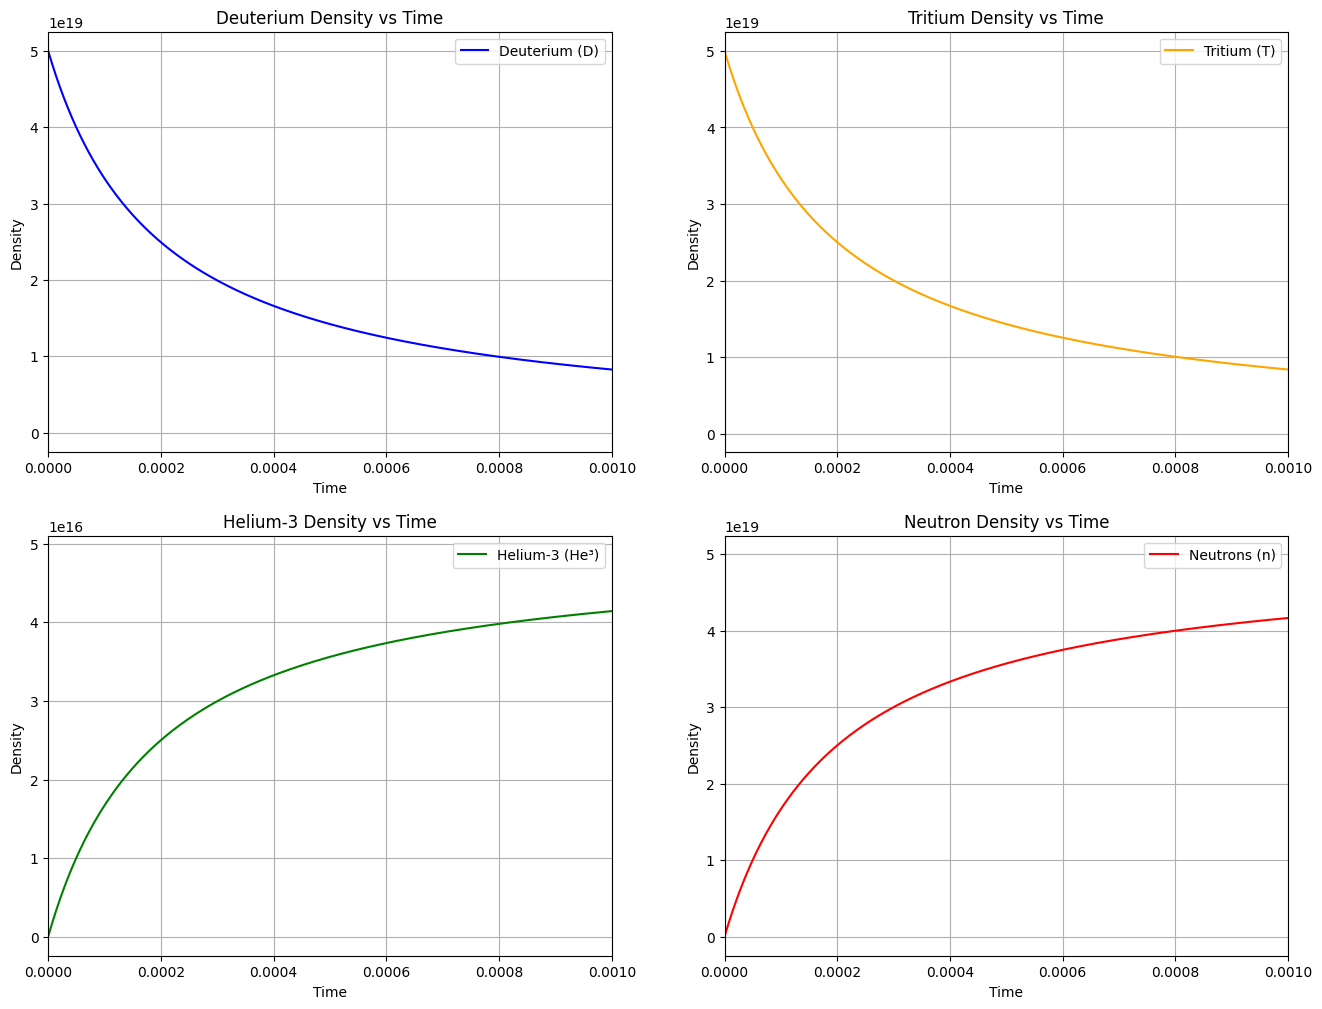

In [12]:
plt.figure(figsize=(16, 12))

# subplot 1: Deuterium
plt.subplot(2, 2, 1)
plt.plot(time, n_D[:-1], label='Deuterium (D)', color = 'blue')
plt.title('Deuterium Density vs Time')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xlim(0, 0.001)
plt.grid(True)
plt.legend()

# subplot 2: Tritium
plt.subplot(2, 2, 2)
plt.plot(time, n_T[:-1], label='Tritium (T)', color = 'orange')
plt.title('Tritium Density vs Time')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xlim(0, 0.001)
plt.grid(True)
plt.legend()

# subplot 3: Helium-3
plt.subplot(2, 2, 3)
plt.plot(time, n_h[:-1], label='Helium-3 (He³)', color = 'green')
plt.title('Helium-3 Density vs Time')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xlim(0, 0.001)
plt.grid(True)
plt.legend()

# subplot 4: Neutron
plt.subplot(2, 2, 4)
plt.plot(time, n_n[:-1], label='Neutrons (n)', color = 'red')
plt.title('Neutron Density vs Time')
plt.xlabel('Time')
plt.ylabel('Density')
plt.xlim(0, 0.001)
plt.grid(True)
plt.legend()

با مشاهده نمودارها

دوتریوم و تریتیوم به‌تدریج کاهش پیدا می‌کنند، چون در واکنش‌های همجوشی مصرف می‌شوند.
هلیوم-۳ و نوترون به‌تدریج افزایش می‌یابند، چرا که محصولات جانبی واکنش دوتریوم_دوتریوم و دوتریوم_تریتیوم هستند.
این نتایج کاملاً با معادلات نرخ واکنش و منطق شبیه‌سازی همخوانی دارد.